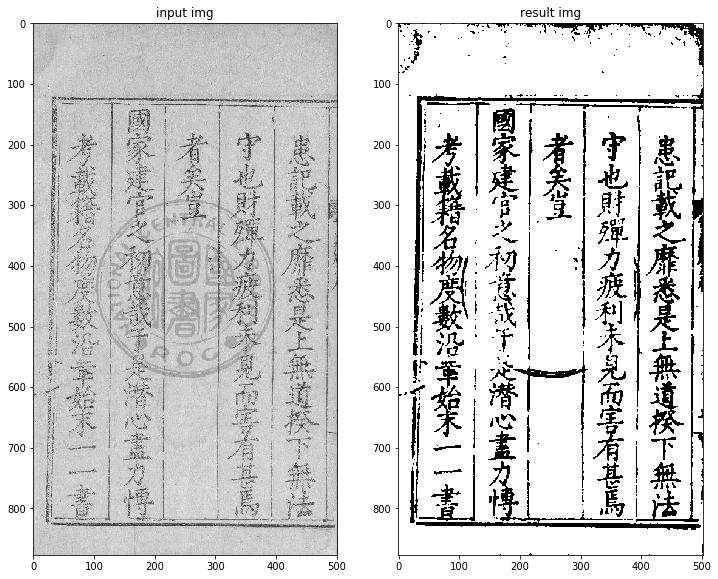

In [19]:
import os
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

def removeWatermark(img, watermark_area):
    """Remove watermark from input img
    
    Args:
        img: The input img in grayscale. 2D numpy array.
        
        watermark_area: The topleft and bottomright of the watermark area. 
            For example: [(x1, y1), (x2, y2)]
            where (x1, y1) is topleft, (x2, y2) is bottomright. Types of x1, x2, y1 and y2 are int.
    
    Return:
        img_result: A binary img without watermark.
    """
    
    topleft = watermark_area[0]
    bottomright = watermark_area[1]
    
    xmin, ymin = topleft
    xmax, ymax = bottomright
    
    ### for watermark area
    # apply gaussian filter (smoothing)
    blur = cv2.GaussianBlur(img, (5, 5), 0)
    
    # Otsu threshold
    ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_TRUNC+cv2.THRESH_OTSU)

    # Otsu threshold again
    ret2, thresh2 = cv2.threshold(thresh, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    ### for other area
    # CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_clahe = clahe.apply(img)

    # apply gaussian filter (smoothing)
    blur_clahe = cv2.GaussianBlur(img_clahe, (5,5), 0)

    # Otsu threshold
    ret3, thresh3 = cv2.threshold(blur_clahe, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # merge the result
    img_result = thresh3.copy()
    img_result[ymin:ymax, xmin:xmax] = thresh2[ymin:ymax, xmin:xmax].copy()
    
    return img_result


if __name__ == '__main__':
    topleft = (116, 285)
    bottomright = (388, 570)
    watermark_area = [topleft, bottomright]
    
    inputfile = "./test2.jpg"
    img = cv2.imread(inputfile, cv2.IMREAD_GRAYSCALE)
    
    result = removeWatermark(img, watermark_area)
    
    plt.figure(figsize = (12, 12))
    plt.subplot(1, 2, 1)
    plt.title("input img")
    plt.imshow(img, "gray")
    
    plt.subplot(1, 2, 2)
    plt.title("result img")
    plt.imshow(result, "gray")
    
    plt.show()

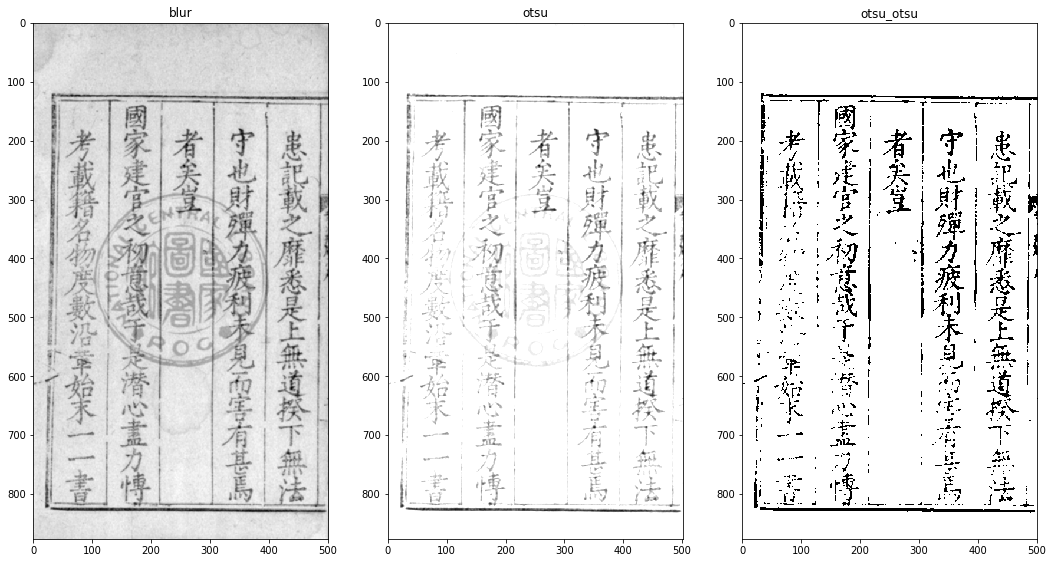

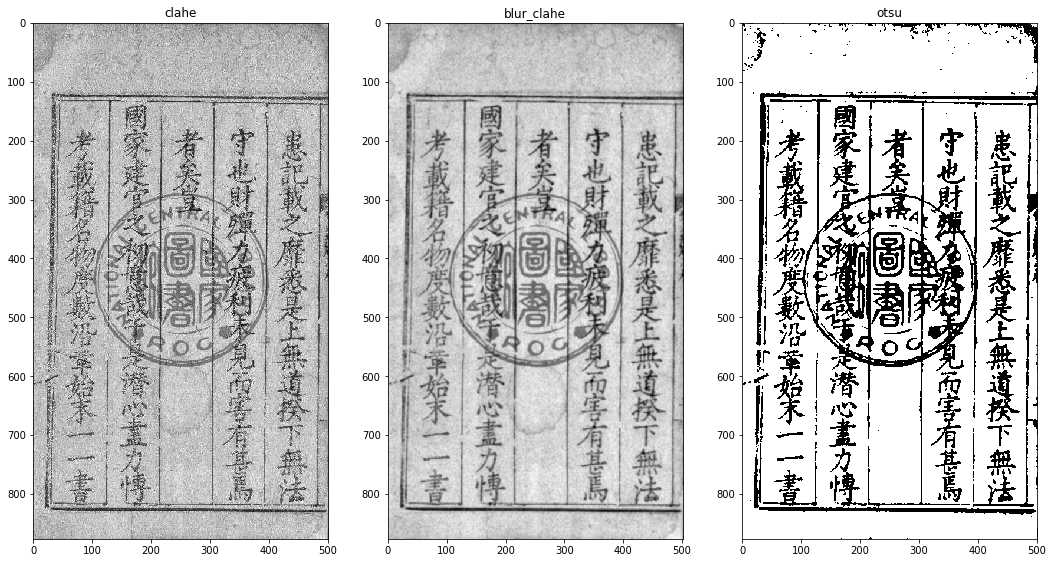

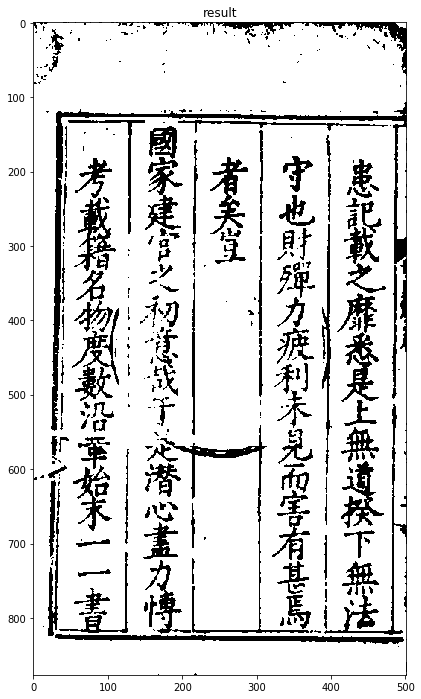

In [14]:
"""
showing images during the process.
"""

import os
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

# watermark = [topleft, bottomright]
topleft = (116, 285)
bottomright = (388, 570)
watermark = [topleft, bottomright]

xmin, ymin = watermark[0]
xmax, ymax = watermark[1]

inputfile = "./test2.jpg"
outputfile = "./removeWatermark.jpg"

# read img
img = cv2.imread(inputfile, cv2.IMREAD_GRAYSCALE)

##### for watermark area
# apply gaussian filter (smoothing)
blur = cv2.GaussianBlur(img,(5,5),0)

# Otsu threshold
ret,thresh = cv2.threshold(blur,0,255,cv2.THRESH_TRUNC+cv2.THRESH_OTSU)

# Otsu threshold again
ret2,thresh2 = cv2.threshold(thresh,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize = (18, 12))
plt.subplot(1, 3, 1)
plt.title("blur")
plt.imshow(blur, 'gray')

plt.subplot(1, 3, 2)
plt.title("otsu")
plt.imshow(thresh, 'gray')

plt.subplot(1, 3, 3)
plt.title("otsu_otsu")
plt.imshow(thresh2, 'gray')

# plt.savefig("./result.jpg")
plt.show()

##### for other area

# CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_clahe = clahe.apply(img)

# apply gaussian filter (smoothing)
blur_clahe = cv2.GaussianBlur(img_clahe,(5,5),0)

# Otsu threshold
ret3,thresh3 = cv2.threshold(blur_clahe,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize = (18, 12))
plt.subplot(1, 3, 1)
plt.title("clahe")
plt.imshow(img_clahe, 'gray')

plt.subplot(1, 3, 2)
plt.title("blur_clahe")
plt.imshow(blur_clahe, 'gray')

plt.subplot(1, 3, 3)
plt.title("otsu")
plt.imshow(thresh3, 'gray')

plt.show()

# merge the result
result = thresh3.copy()
result[ymin:ymax, xmin:xmax] = thresh2[ymin:ymax, xmin:xmax].copy()

# save the result image
# cv2.imwrite(outputfile, result)

plt.figure(figsize = (12, 12))
plt.title("result")
plt.imshow(result, 'gray')
plt.show()